# Compare Messari and Convex Community Subgraph Outputs

TODO:
1. The subgraph data is really different. Need a "source of truth" to determine what is "correct"

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from datafetcher import DataFetcher
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt

## UST Wormhole pool during Luna Collapse

In [47]:
pool_name = "3pool"
datafetcher = DataFetcher('2022-05-01', '2022-06-01')

# Pool Data

In [5]:
# NOTE: Seems like Convex community doesn't have an obvious query for pool reserves/composition
df_pool_messari = datafetcher.get_pool_data(pool_name, source="messari") # optionally save=True

# Swap Data

In [56]:
df_swaps_cvx = datafetcher.get_swaps_data(pool_name, source="cvx") # optionally save=True
df_swaps_messari = datafetcher.get_swaps_data(pool_name, source="messari") # optionally save=True

In [57]:
df_swaps_cvx.head()

,tokenIn.symbol,amountIn,amountInUSD,tokenOut.symbol,amountOut,amountOutUSD,from,hash
datetime,,,,,,,,
2022-05-01 00:07:42,USDC,1.000000e+05,None,USDT,9.996116e+04,None,0x42de10a720c59ed8dcc6e55d5e61e03b5ad70905,0x44e5c1cb800b5fbfa47be97d7e4b852df11a2cb703e4...
2022-05-01 00:18:56,DAI,1.572734e+04,None,USDT,1.572088e+04,None,0x12e599006a5f19819cde6fabcebbd8586688c8ac,0x679c627fa893ddffd087700475d2af1872c5dcbb0a02...
2022-05-01 00:54:34,USDC,4.000000e+04,None,USDT,3.998441e+04,None,0xfa9a30350048b2bf66865ee20363067c66f67e58,0x456932cf29b6a3ef7693de92382c96b83ec9ed4e408e...
2022-05-01 00:50:10,DAI,1.200000e+04,None,USDC,1.199615e+04,None,0x8b225e3680f8a2eabe466f27cb172cf871cd8623,0xf2e564221a980ef3bfe8b853777503b1b0b629bfe667...
2022-05-01 02:09:48,USDC,2.028025e+06,None,USDT,2.027227e+06,None,0x773d161310d07cafc6f767ca24f43e52163b9be6,0x268f498e6413635ae722705b3f72b991b199d77e5f95...


In [58]:
df_swaps_messari.head()

,tokenIn.symbol,amountIn,amountInUSD,tokenOut.symbol,amountOut,amountOutUSD,from,hash
timestamp,,,,,,,,
2022-05-01 00:07:42,USDC,1.000000e+05,1.000000e+05,USDT,9.996116e+04,9.996116e+04,0x42de10a720c59ed8dcc6e55d5e61e03b5ad70905,0x44e5c1cb800b5fbfa47be97d7e4b852df11a2cb703e4...
2022-05-01 00:18:56,DAI,1.572734e+04,1.572734e+04,USDT,1.572088e+04,1.572088e+04,0x12e599006a5f19819cde6fabcebbd8586688c8ac,0x679c627fa893ddffd087700475d2af1872c5dcbb0a02...
2022-05-01 00:54:34,USDC,4.000000e+04,4.000000e+04,USDT,3.998441e+04,3.998441e+04,0xfa9a30350048b2bf66865ee20363067c66f67e58,0x456932cf29b6a3ef7693de92382c96b83ec9ed4e408e...
2022-05-01 00:50:10,DAI,1.200000e+04,1.200000e+04,USDC,1.199615e+04,1.199615e+04,0x8b225e3680f8a2eabe466f27cb172cf871cd8623,0xf2e564221a980ef3bfe8b853777503b1b0b629bfe667...
2022-05-01 02:09:48,USDC,2.028025e+06,2.028025e+06,USDT,2.027227e+06,2.027227e+06,0x773d161310d07cafc6f767ca24f43e52163b9be6,0x268f498e6413635ae722705b3f72b991b199d77e5f95...


In [61]:
tokens_messari = set(df_swaps_messari['tokenIn.symbol'].unique().tolist() + df_swaps_messari['tokenOut.symbol'].unique().tolist())
tokens_cvx = set(df_swaps_cvx['tokenIn.symbol'].unique().tolist() + df_swaps_cvx['tokenOut.symbol'].unique().tolist())
print(f"Same tokens? {tokens_messari == tokens_cvx}")
tokens_messari

Same tokens? True


{'DAI', 'USDC', 'USDT'}

In [79]:
# NOTE: Seems that Messari is missing some swaps (or Convex is double counting? probs not)
print(f"Swap Count\nMessari:{df_swaps_messari.shape[0]}\nConvex:{df_swaps_cvx.shape[0]}")

Swap Count
Messari:6300
Convex:7166


In [114]:
missing_in_cvx = set(df_swaps_messari["hash"]) - set(df_swaps_cvx["hash"])
missing_in_messari = set(df_swaps_cvx["hash"]) - set(df_swaps_messari["hash"])

print(f"Missing in cvx: {len(missing_in_cvx)}, Missing in messari: {len(missing_in_messari)}")

Missing in cvx: 0, Missing in messari: 799


In [87]:
print(f"Swap hash Count\nMessari:{df_swaps_messari['hash'].unique().shape[0]}\nConvex:{df_swaps_cvx['hash'].unique().shape[0]}")

Swap hash Count
Messari:6300
Convex:7099


In [83]:
print(f"Amount In Sum\nMessari:{df_swaps_messari['amountIn'].sum()}\nConvex:{df_swaps_cvx['amountIn'].sum()}")
print(f"Amount Out Sum\nMessari:{df_swaps_messari['amountOut'].sum()}\nConvex:{df_swaps_cvx['amountOut'].sum()}")

Amount In Sum
Messari:5966758886.4561
Convex:6646921227.33356
Amount Out Sum
Messari:5966506109.375509
Convex:6646537795.05013


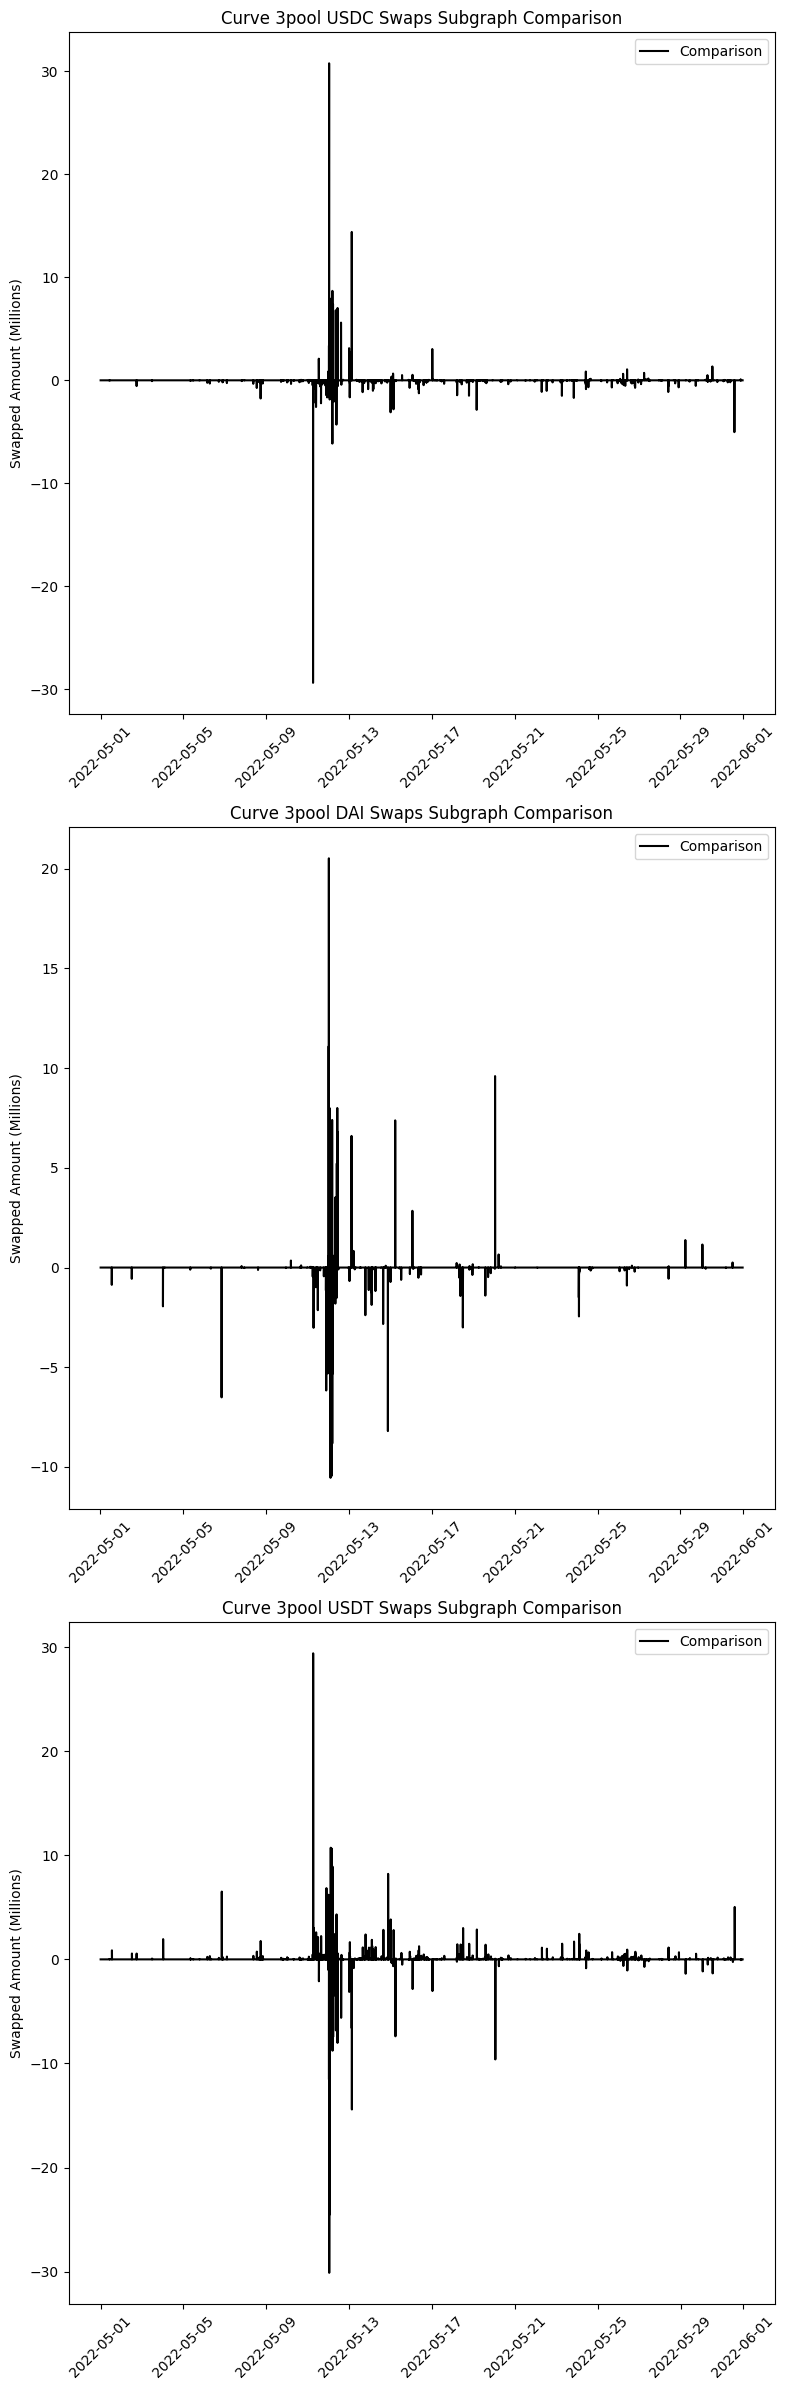

In [66]:
tokens = tokens_messari
freq = '1min'

fig, axs = plt.subplots(len(tokens), 1, figsize=(8, 8*len(tokens)))

for i, token in enumerate(tokens):
    # Cvx
    swap_in = df_swaps_cvx[df_swaps_cvx['tokenIn.symbol']==token]['amountIn'].resample(freq).sum()
    swap_out = -1*df_swaps_cvx[df_swaps_cvx['tokenOut.symbol']==token]['amountOut'].resample(freq).sum()
    flow_cvx = pd.concat([swap_in, swap_out], axis=1).fillna(0)
    flow_cvx['netFlowCvx'] = flow_cvx['amountIn'] + flow_cvx['amountOut']
    flow_cvx = flow_cvx[['netFlowCvx']]

    # Messari
    swap_in = df_swaps_messari[df_swaps_messari['tokenIn.symbol']==token]['amountIn'].resample(freq).sum()
    swap_out = -1*df_swaps_messari[df_swaps_messari['tokenOut.symbol']==token]['amountOut'].resample(freq).sum()
    flow_messari = pd.concat([swap_in, swap_out], axis=1).fillna(0)
    flow_messari['netFlowMessari'] = flow_messari['amountIn'] + flow_messari['amountOut']
    flow_messari = flow_messari[['netFlowMessari']]

    flow = pd.concat([flow_cvx, flow_messari], axis=1).fillna(0)
    flow['comparison'] = flow['netFlowCvx'] - flow['netFlowMessari']

    axs[i].plot(flow.index, flow['comparison']/1e6, label='Comparison', color='black')

    axs[i].set_ylabel('Swapped Amount (Millions)')
    axs[i].set_title(f"Curve {pool_name} {token} Swaps Subgraph Comparison")
    axs[i].tick_params(axis='x', rotation=45)

    axs[i].legend()

fig.tight_layout()

### Observations

- UST wormhole pool is weird, the 3CRV LP token is included in swap data for both cvx and messari?
- Amount in and out is too different for 3pool, that can't be right. What is going on in mid-May 2022? 
    - Probs because Messari is missing some swaps (given the count above). Are there patterns in missing swaps?
    - 65 swaps have duplicated tx hashes on convex, none on messari. Why?

In [103]:
sample_messari = df_swaps_messari[df_swaps_messari.index > '2022-05-09']
sample_messari = sample_messari[sample_messari.index < '2022-05-15']

sample_cvx = df_swaps_cvx[df_swaps_cvx.index > '2022-05-10']
sample_cvx = sample_cvx[sample_cvx.index < '2022-05-15']

In [104]:
sample_messari.head()

,tokenIn.symbol,amountIn,amountInUSD,tokenOut.symbol,amountOut,amountOutUSD,from,hash
timestamp,,,,,,,,
2022-05-09 00:05:00,USDT,4002.56944,4002.56944,DAI,4000.97293,4000.97293,0x12e599006a5f19819cde6fabcebbd8586688c8ac,0x5d458545bfcdcf506113a2517fe71c301d2dad2e92ba...
2022-05-09 01:17:21,DAI,20000.00000,20000.00000,USDC,19993.74188,19993.74188,0x2789fd4408630121bbc3728ce351193423d5fa8c,0x10512bc0421b2bd2e4b06e4ad0e3496292857cf3042a...
2022-05-09 01:26:36,USDC,1000000.00000,1000000.00000,USDT,999812.38101,999812.38101,0x455d7eb74860d0937423b9184f9e8461aa354ebb,0x9aacf3b0a45cdbecdf3e6c081ff956d7aaaadd0ce808...
2022-05-09 03:29:37,USDC,4267.95596,4267.95596,USDT,4267.17960,4267.17960,0x80d4230c0a68fc59cb264329d3a717fcaa472a13,0x354956ad8fd94732d988fc8555b71c438f3b5dd0724a...
2022-05-09 03:28:23,USDC,158928.21170,158928.21170,DAI,158883.07351,158883.07351,0x00000000000a47b1298f18cf67de547bbe0d723f,0x76e8fd56c38a57433cf9fe53cedc20803ef3d8062499...


In [105]:
sample_cvx.head()

,tokenIn.symbol,amountIn,amountInUSD,tokenOut.symbol,amountOut,amountOutUSD,from,hash
datetime,,,,,,,,
2022-05-10 00:12:22,USDT,2.056806e+05,None,USDC,2.055159e+05,None,0x45716d9eddbc332df1d42b9f540fbebed671b20f,0xed3f00740d77a7f0f92ea8dfdb2d0719dae3f2f4c742...
2022-05-10 00:21:52,USDT,1.000000e+04,None,DAI,9.993677e+03,None,0x12e599006a5f19819cde6fabcebbd8586688c8ac,0x797c85dc09ca4c0b6ebb1bf7f36917dfcb3274daeb99...
2022-05-10 00:34:46,USDC,2.298352e+05,None,DAI,2.298064e+05,None,0x166a309efceedc82c501014130beadd0b3097475,0x26063dd3fa2fc70db6e5b58f813614ca51f1b31af4d2...
2022-05-10 00:34:46,DAI,1.594774e+06,None,USDT,1.594827e+06,None,0x04b35d8eb17729b2c4a4224d07727e2f71283b73,0xd9d1aa2c4c336d2f3b6c4b376c14da06acd24547b197...
2022-05-10 00:34:46,USDC,1.470294e+05,None,DAI,1.470111e+05,None,0x166a309efceedc82c501014130beadd0b3097475,0xea042a403c054a516ff822b2b60225fe170b82b990e8...


In [110]:
sample_cvx.iloc[0]['hash']

'0xed3f00740d77a7f0f92ea8dfdb2d0719dae3f2f4c74246e22eac19e1bf483a7b'

In [111]:
# NOTE: This swap was clearly lost somehow on Messari: https://etherscan.io/tx/0xed3f00740d77a7f0f92ea8dfdb2d0719dae3f2f4c74246e22eac19e1bf483a7b
# Seems to be an MEV bot doing a bunch of swaps and transfers using Uniswap and Curve of USDC, WETH, USDT, and UST
# Why would Messari's subgraph miss this? Happened on May 10th, 2022
df_swaps_messari[df_swaps_messari['hash'] == '0xed3f00740d77a7f0f92ea8dfdb2d0719dae3f2f4c74246e22eac19e1bf483a7b']

,tokenIn.symbol,amountIn,amountInUSD,tokenOut.symbol,amountOut,amountOutUSD,from,hash
timestamp,,,,,,,,


In [118]:
df_swaps_cvx_trimmed = df_swaps_cvx[~df_swaps_cvx['hash'].isin(missing_in_messari)]
df_swaps_cvx_trimmed.shape

(6365, 8)

In [119]:
df_swaps_messari.shape

(6300, 8)

In [132]:
duplicates = df_swaps_cvx_trimmed[df_swaps_cvx_trimmed['hash'].duplicated()]
print(duplicates['hash'][0])
duplicates.head()

0xc64eb8606d7b474635ee64bf1289c7d86547b9d451c782ee6bb727790d4ed265


,tokenIn.symbol,amountIn,amountInUSD,tokenOut.symbol,amountOut,amountOutUSD,from,hash
datetime,,,,,,,,
2022-05-04 02:28:29,DAI,9363.01147,None,USDC,9359.92655,None,0x03e9e6f593b33d8e5362297ccd6955a035cd43a5,0xc64eb8606d7b474635ee64bf1289c7d86547b9d451c7...
2022-05-12 04:35:24,USDT,285000.00000,None,USDC,281757.01271,None,0xd12bcdfb9a39be79da3bdf02557efdcd5ca59e77,0x7a6e3029a5726e11ce757cbd7e8227fe3a3ac7516875...
2022-05-14 03:40:23,DAI,475389.94515,None,USDC,475332.97470,None,0xc118f2eb1291f9bc0c2a4c2d61b59f1785b047b5,0x74ce92086bcf4039cfcb8b09630f4aecd448ab63888d...
2022-05-14 04:23:20,USDC,63132.25000,None,DAI,63129.34904,None,0xd12bcdfb9a39be79da3bdf02557efdcd5ca59e77,0x3f7f92af22629a639f2076cdd695bde144984bfde623...
2022-05-15 10:07:49,USDC,658.02000,None,DAI,657.98642,None,0xd12bcdfb9a39be79da3bdf02557efdcd5ca59e77,0xcc2bfd2870e2f61d7085b30fddbffcd772100c9bb3fd...


In [137]:
# TODO: Make sure that the duplicate isn't an issue with my code
# if the subgraph actually has duplicates, that's great, flag to Benny. We found something useful :)
df_swaps_cvx[df_swaps_cvx['hash'] == '0xc64eb8606d7b474635ee64bf1289c7d86547b9d451c782ee6bb727790d4ed265']

,tokenIn.symbol,amountIn,amountInUSD,tokenOut.symbol,amountOut,amountOutUSD,from,hash
datetime,,,,,,,,
2022-05-04 02:28:29,DAI,9363.01147,None,USDT,9359.50005,None,0x03e9e6f593b33d8e5362297ccd6955a035cd43a5,0xc64eb8606d7b474635ee64bf1289c7d86547b9d451c7...
2022-05-04 02:28:29,DAI,9363.01147,None,USDC,9359.92655,None,0x03e9e6f593b33d8e5362297ccd6955a035cd43a5,0xc64eb8606d7b474635ee64bf1289c7d86547b9d451c7...


In [136]:
df_swaps_messari[df_swaps_messari['hash'] == '0xc64eb8606d7b474635ee64bf1289c7d86547b9d451c782ee6bb727790d4ed265']

,tokenIn.symbol,amountIn,amountInUSD,tokenOut.symbol,amountOut,amountOutUSD,from,hash
timestamp,,,,,,,,
2022-05-04 02:28:29,DAI,9363.01147,9363.01147,USDC,9359.92655,9359.92655,0x03e9e6f593b33d8e5362297ccd6955a035cd43a5,0xc64eb8606d7b474635ee64bf1289c7d86547b9d451c7...
